## Some necessary library imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Some data preprocessing

In [ ]:
data = pd.read_csv('/content/sbi_l.csv')
data.drop(['Unnamed: 0'],axis = 1, inplace = True)
y = pd.DataFrame(data['CloseNext'])
X = data.drop(['CloseNext'], axis = 1)

In [ ]:
X = np.array(X)
y = np.array(y)
#X = X[1700:2030,:]
#y = y[1700:2030,:]
y = y.flatten()

Feature scaling

In [ ]:
scaled = StandardScaler()
scaled.fit(X)
X = scaled.transform(X)

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Support Vector Machine Regression

Performing Grid Search for finding best parameters for SVM Regression

In [ ]:
parameters = {'kernel':('poly', 'rbf'), 'C':[10000,20000,30000,50000,100000],'degree':[1,2],'epsilon':[0.1,1,2,4,5],'tol': [0.1,0.5]}
sv = SVR(gamma = 'auto')
grid_search = GridSearchCV(sv, parameters, verbose = 3 ,cv = 3)

In [ ]:
#grid_search.fit(X_train,y_train)

In [ ]:
#grid_search.best_estimator_

In [ ]:
SVR(C=30000, cache_size=200, coef0=0.0, degree=1, epsilon=5, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.1, verbose=False)

SVR(C=30000, degree=1, epsilon=5, gamma='auto', kernel='poly', tol=0.1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
parameters = {'kernel': ('linear', 'rbf'), 'C': [10, 100, 1000], 'max_iter': [10]}

# Initialize the SVR model
sv = SVR()

# Create the grid search object
grid_search = GridSearchCV(sv, parameters, verbose=1, cv=3)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Extract the best estimator
svm_regression = grid_search.best_estimator_

# Fit the best estimator to the training

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

In [ ]:
grid_search = GridSearchCV(sv, parameters, verbose=1, cv=3)

In [ ]:
svm_predict = svm_regression.predict(X_test)

## Testing

In [ ]:
error = mean_absolute_error(svm_predict,y_test)
per_err = (error/np.mean(y_test)) * 100

In [ ]:
print('The mean absolute error is {} and percentage error is {}.'.format(error,per_err))

The mean absolute error is 13.592280526786498 and percentage error is 5.559627872642844.


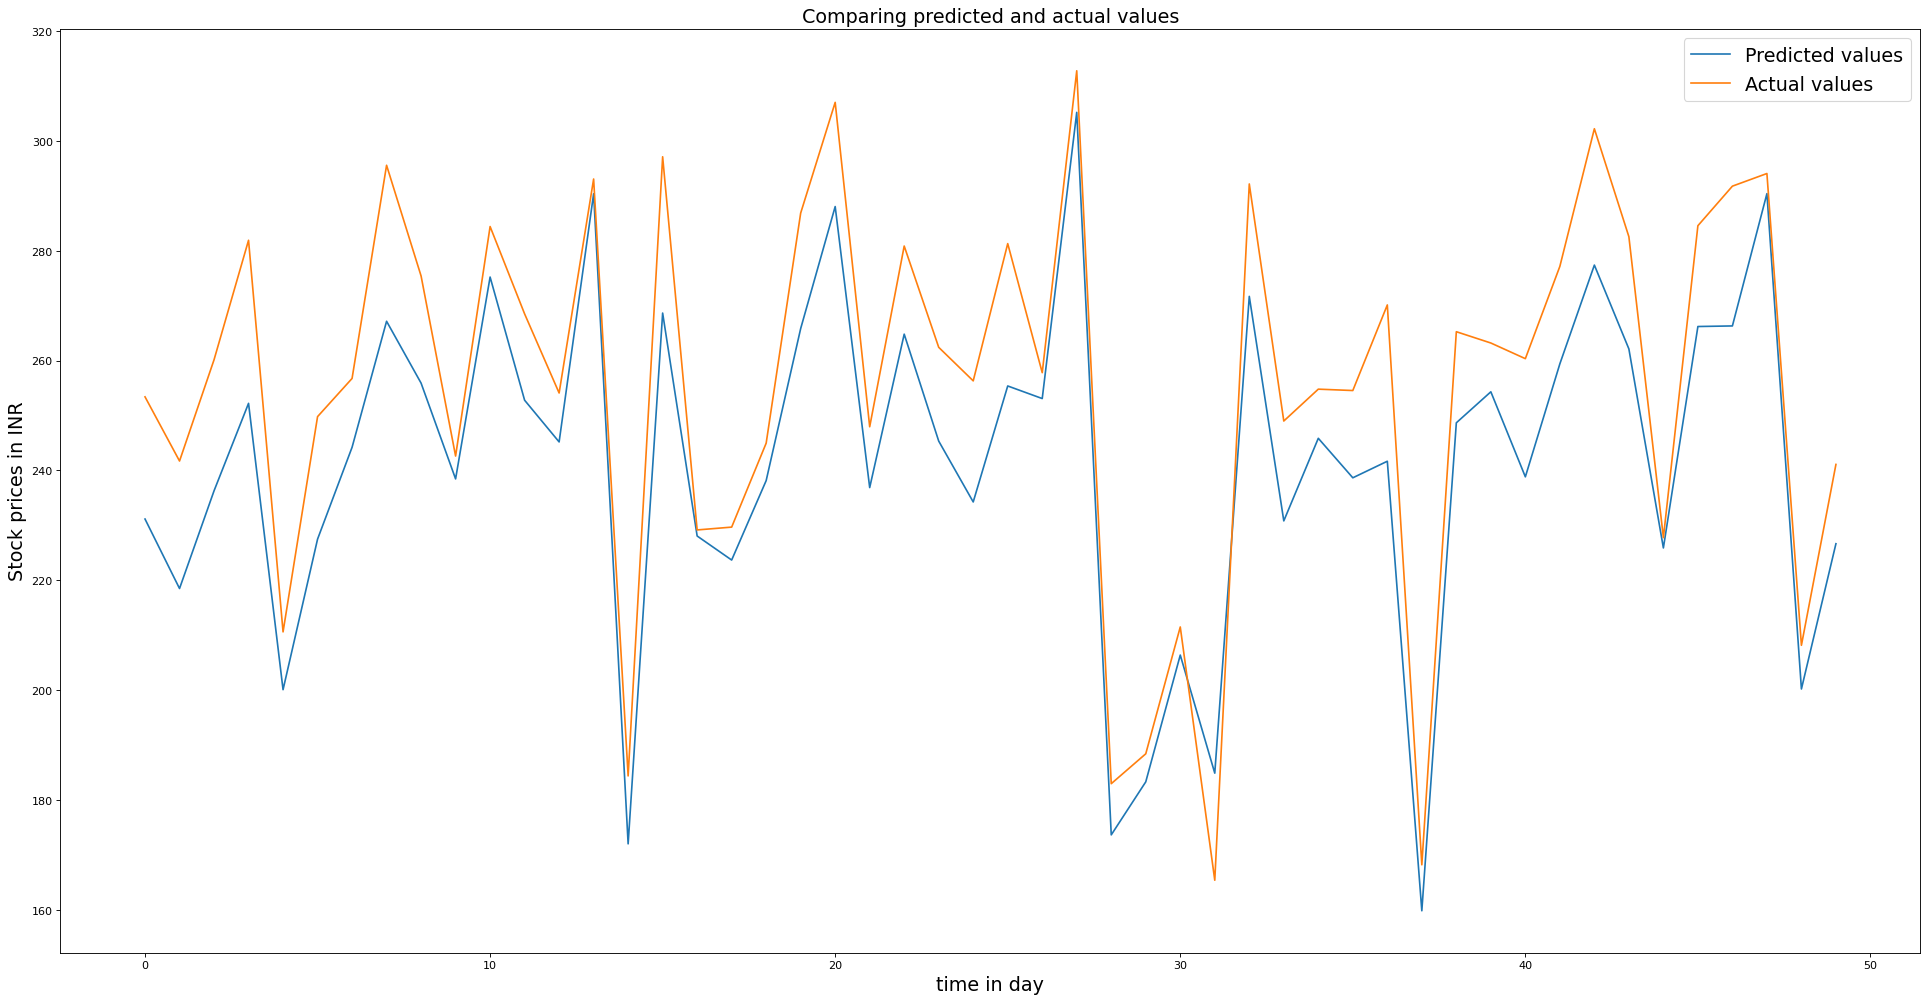

In [ ]:
fig=plt.figure(figsize=(30, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(svm_predict[0:50],label = "Predicted values")
plt.plot(y_test[0:50], label = "Actual values")
plt.xlabel('time in day', fontsize = 'xx-large')
plt.ylabel('Stock prices in INR', fontsize = 'xx-large')
plt.title('Comparing predicted and actual values', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()